In [1]:
from pathlib import Path
import sys
sys.path.append("../..")
import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation import metrics, get_tester
from neuralhydrology.nh_run import start_run
from neuralhydrology.utils.config import Config



In [2]:
#start_run(config_file=Path("toronto_mts.yml"))
start_run(config_file=Path("1_basin.yml"))

#start_run(config_file=Path("toronto_ar.yml"))

2025-06-12 14:04:56,224: Logging to c:\Users\everett\Documents\GitHub\neuralhydrology\examples\04-Multi-Timescale\runs\test_run_1206_140456\output.log initialized.
2025-06-12 14:04:56,225: ### Folder structure created at c:\Users\everett\Documents\GitHub\neuralhydrology\examples\04-Multi-Timescale\runs\test_run_1206_140456
2025-06-12 14:04:56,226: ### Run configurations for test_run
2025-06-12 14:04:56,226: experiment_name: test_run
2025-06-12 14:04:56,227: use_frequencies: ['1h', '1D']
2025-06-12 14:04:56,228: train_basin_file: 516-camels-basins.txt
2025-06-12 14:04:56,229: validation_basin_file: 516-camels-basins.txt
2025-06-12 14:04:56,229: test_basin_file: 516-camels-basins.txt
2025-06-12 14:04:56,230: train_start_date: 1999-10-01 00:00:00
2025-06-12 14:04:56,231: train_end_date: 2008-09-30 00:00:00
2025-06-12 14:04:56,232: validation_start_date: 1996-10-01 00:00:00
2025-06-12 14:04:56,232: validation_end_date: 1999-09-30 00:00:00
2025-06-12 14:04:56,233: test_start_date: 1989-10-0

: 

In [ ]:
run_config = Config("toronto_1h.yml")
run_dir = Path("runs/test_1h_0704_223329")  # you'll find this path in the output of the training above.

# create a tester instance and start evaluation
tester = get_tester(cfg=Config(run_dir / "config.yml"), run_dir=run_dir, period="test", init_model=True)
results = tester.evaluate(save_results=False, metrics=run_config.metrics)

results.keys()

2025-04-07 22:16:23,697: No specific hidden size for frequencies are specified. Same hidden size is used for all.
2025-04-07 22:16:23,760: Using the model weights from runs\test_run_0704_215611\model_epoch017.pt


c:\Users\everett\Documents\GitHub\neuralhydrology\examples\04-Multi-Timescale\../..\neuralhydrology\datautils\utils.py:340: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_two = to_offset(freq_two)
c:\Users\everett\Documents\GitHub\neuralhydrology\examples\04-Multi-Timescale\../..\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
c:\Users\everett\Documents\GitHub\neuralhydrology\examples\04-Multi-Timescale\../..\neuralhydrology\evaluation\tester.py:143: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-mod

# Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]2025-04-07 22:16:23,800: ## Warning: Hourly nldas_hourly NetCDF file not found. Falling back to slower csv files.


c:\Users\everett\Documents\GitHub\neuralhydrology\examples\04-Multi-Timescale\../..\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\everett\Documents\GitHub\neuralhydrology\examples\04-Multi-Timescale\../..\neuralhydrology\datasetzoo\basedataset.py:433: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offsets = [(self.seq_len[i] - self._predict_last_n[i]) * to_offset(freq)
c:\Users\everett\Documents\GitHub\neuralhydrology\examples\04-Multi-Timescale\../..\neuralhydrology\datasetzoo\basedataset.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  if not all(to_offset(freq).is_on_offset(start_date) for freq in self.frequencies):
c:\Users\everett\Documents\GitHub\neuralhydrology\examples\04-Multi-Timescale\../..\neuralhydrology\datautils\utils.py:340: F

# Evaluation: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


c:\Users\everett\Documents\GitHub\neuralhydrology\examples\04-Multi-Timescale\../..\neuralhydrology\datautils\utils.py:340: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_two = to_offset(freq_two)
c:\Users\everett\Documents\GitHub\neuralhydrology\examples\04-Multi-Timescale\../..\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
c:\Users\everett\Documents\GitHub\neuralhydrology\examples\04-Multi-Timescale\../..\neuralhydrology\evaluation\tester.py:275: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  'time_step': ((dates[freq][0, :] - dates[freq][0, -1]) / pd.Timedelta(freq)).astype(np.int64) +
c:\Users\everett\Documents\GitHub\neuralhydrology\examples\04-Multi-Timescale\../..\neuralhydrology\evaluation\tester.py

dict_keys(['03291780'])

Let's take a closer look at the predictions and do some plots, starting with the daily results.
Note that units are mm/h even for daily values, since we predict daily averages.

In [ ]:
results["03291780"]["1D"]["xr"]

<xarray.Dataset>
Dimensions:                (date: 2557, time_step: 1)
Coordinates:
  * date                   (date) datetime64[ns] 1989-10-01 ... 1996-09-30
  * time_step              (time_step) int64 0
Data variables:
    QObs_CAMELS(mm/h)_obs  (date, time_step) float32 0.002518 ... 0.03639
    QObs_CAMELS(mm/h)_sim  (date, time_step) float32 0.01783 0.01639 ... 0.06955

Text(0.5, 1.0, 'Test period - daily NSE 0.607')

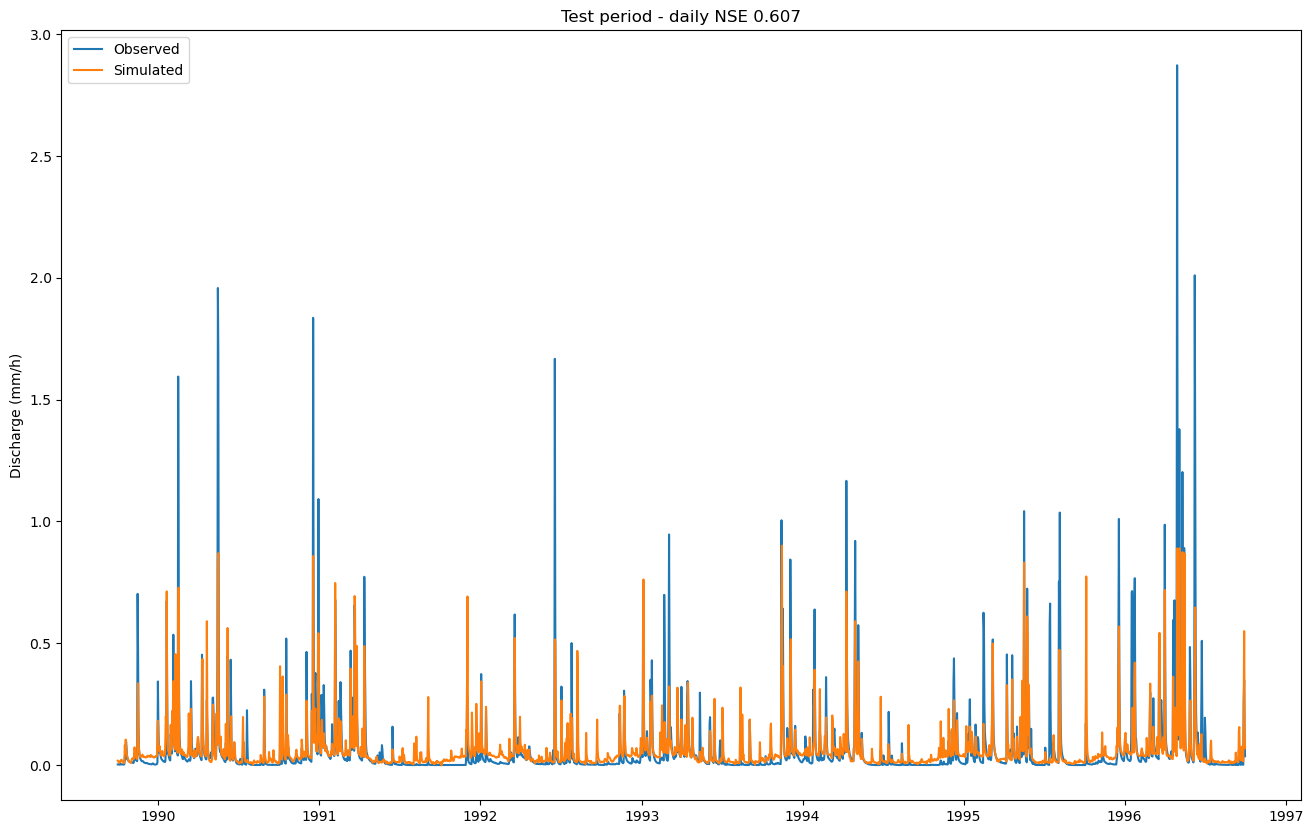

In [ ]:
# extract observations and simulations
daily_qobs = results["03291780"]["1D"]["xr"]["QObs_CAMELS(mm/h)_obs"]
daily_qsim = results["03291780"]["1D"]["xr"]["QObs_CAMELS(mm/h)_sim"]

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(daily_qobs["date"], daily_qobs, label="Observed")
ax.plot(daily_qsim["date"], daily_qsim, label="Simulated")
ax.legend()
ax.set_ylabel("Discharge (mm/h)")
ax.set_title(f"Test period - daily NSE {results['03291780']['1D']['NSE_1D']:.3f}")



...and finally, let's look more closely at the last few months' hourly predictions:

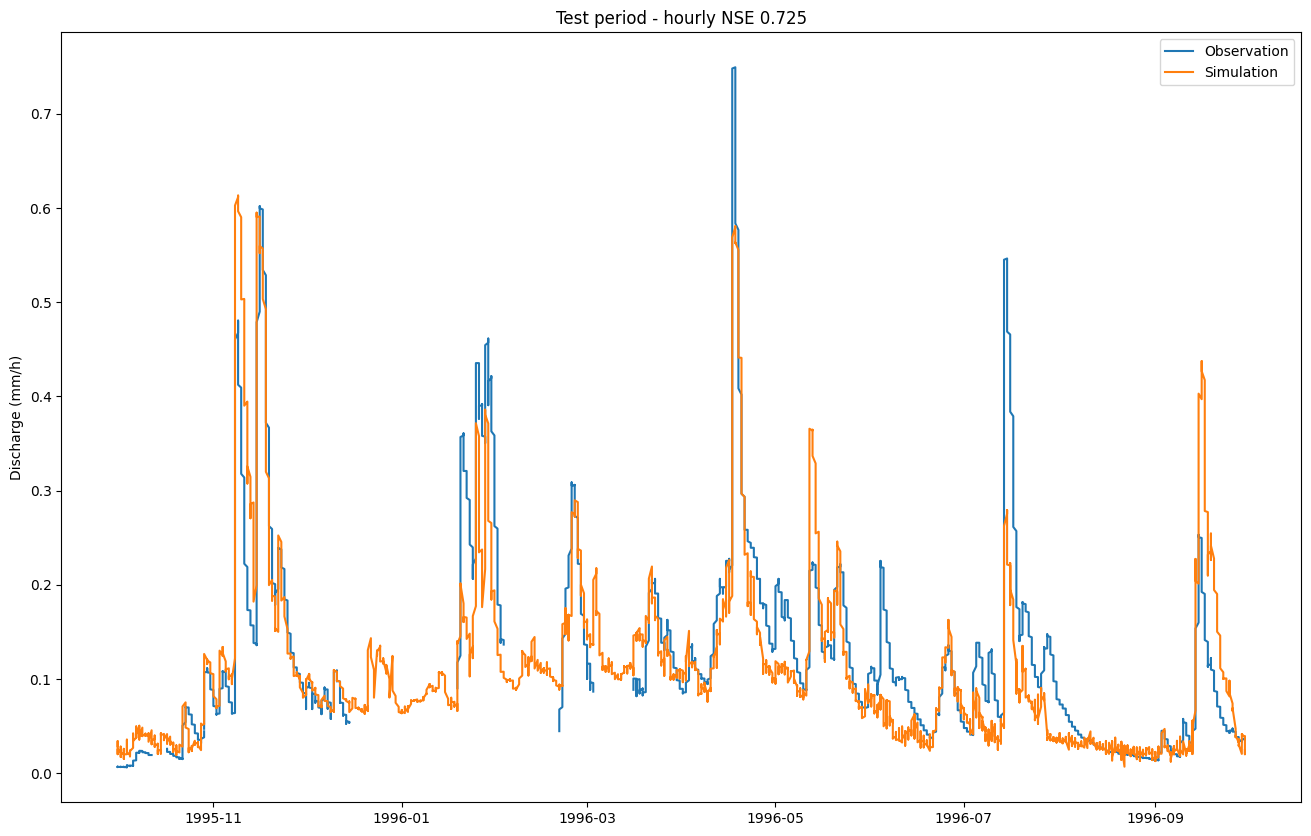

In [ ]:
# extract a date slice of observations and simulations
hourly_xr = results["01022500"]["1h"]["xr"].sel(date=slice("10-1995", None))

# The hourly data is indexed with two indices: The date (in days) and the time_step (the hour within that day).
# As we want to get a continuous plot of several days' hours, we select all 24 hours of each day and then stack
# the two dimensions into one consecutive datetime dimension.
hourly_xr = hourly_xr.isel(time_step=slice(-24, None)).stack(datetime=['date', 'time_step'])
hourly_xr['datetime'] = hourly_xr.coords['date'] + hourly_xr.coords['time_step']

hourly_qobs = hourly_xr["qobs_mm_per_hour_obs"]
hourly_qsim = hourly_xr["qobs_mm_per_hour_sim"]

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(hourly_qobs["datetime"], hourly_qobs, label="Observation")
ax.plot(hourly_qsim["datetime"], hourly_qsim, label="Simulation")
ax.set_ylabel("Discharge (mm/h)")
ax.set_title(f"Test period - hourly NSE {results['01022500']['1h']['NSE_1h']:.3f}")
_ = ax.legend()